ShallowNet(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)
tensor([ 0.2273, -0.4492, -0.1371, -0.1893], grad_fn=<SqueezeBackward0>)
tensor([ 0.,  0.,  0., -4.], grad_fn=<RsubBackward1>)
Test
tensor([[1., 1.]])
Test
tensor([-1.])
Iter: 9999; Loss: 1.778835; ||g||: 1.470774
Parameter containing:
tensor([[0.6674, 0.6674]], requires_grad=True)
Parameter containing:
tensor([0.3330], requires_grad=True)


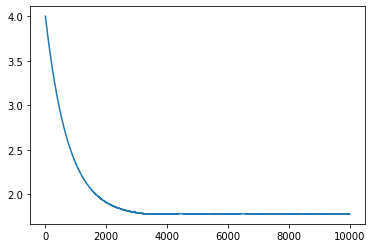

In [54]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(1)
X = torch.Tensor([[1, 0, 0, -1],[0, 1, 0, -1]])
y = torch.Tensor([1, 1, -1, -1])

alpha = 0.001
C = 1

class ShallowNet(nn.Module):
    def __init__(self):
        super(ShallowNet, self).__init__()
        self.fc1 = nn.Linear(2,1, bias=True)
    
    def forward(self, X):
        return self.fc1(X)

net = ShallowNet()
print(net)

print(net(torch.transpose(X,0,1)).squeeze())

optimizer = optim.SGD(net.parameters(), lr=alpha, weight_decay=0)
optimizer.zero_grad()

params = list(net.parameters())
params[0].data = torch.Tensor([[2, 2]])
params[1].data = torch.Tensor([-1])

farr = []

for iter in range(10000):
    if iter==0:
        print(1 - y*net(torch.transpose(X,0,1)).squeeze())
    ##############################
    ## Complete this single line which is our cost function
    ## Dimensions: loss (scalar)
    ##############################
    loss = C/2*torch.norm(net.fc1.weight)**2 + torch.sum(torch.max(torch.zeros(1),1 - y*net(torch.transpose(X,0,1)).squeeze()))
    #loss = C/2*torch.norm(net.fc1.weight)**2 + torch.sum(torch.max(torch.zeros(1),1 - y*(torch.matmul(net.fc1.weight,X) + net.fc1.bias)))
    #loss = C/2*torch.norm(params[0])**2 + torch.sum(torch.max(torch.zeros_like(y),torch.ones_like(y)-y*(torch.matmul(params[0],X) + params[1])))
    loss.backward()
    gn = 0
    for f in net.parameters():
        if iter==0:
            print("Test")
            print(f.grad)
        gn = gn + torch.norm(f.grad)
    #print("Iter: %d; Loss: %f; ||g||: %f" % (iter, loss, gn))
    optimizer.step()
    optimizer.zero_grad()

    farr.append(loss.item())
    
print("Iter: %d; Loss: %f; ||g||: %f" % (iter, loss, gn))
for f in net.parameters():
    print(f)

plt.plot(farr)
plt.show()